# Dataframe

In [1]:
import pandas as pd, IPython.display as dp

eq_df = pd.read_csv('earthquakes-1.csv')
fb_2018 = pd.read_csv('fb_stock_prices_2018.csv')

dp.display(fb_2018, eq_df)

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...,...
246,2018-12-24,123.10,129.74,123.0200,124.06,22066002
247,2018-12-26,126.00,134.24,125.8900,134.18,39723370
248,2018-12-27,132.44,134.99,129.6700,134.52,31202509
249,2018-12-28,135.34,135.92,132.2000,133.20,22627569


,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


# Activity

object


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

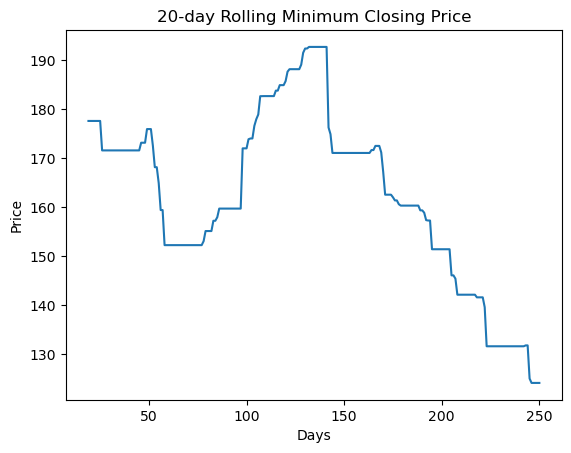

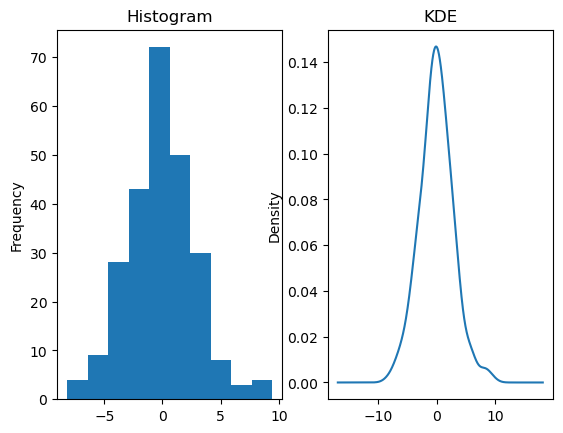

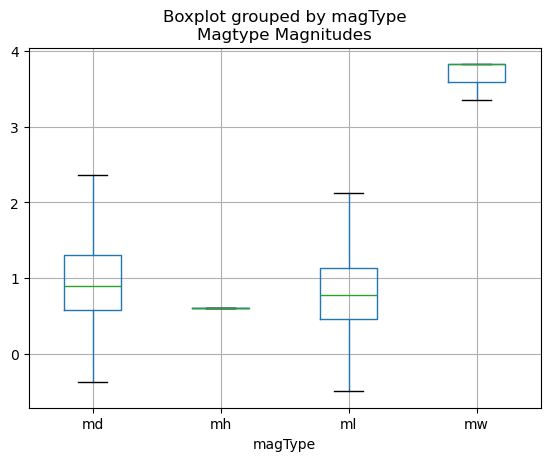

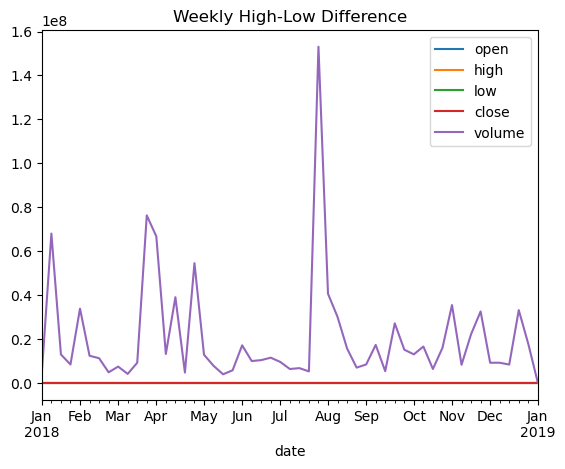

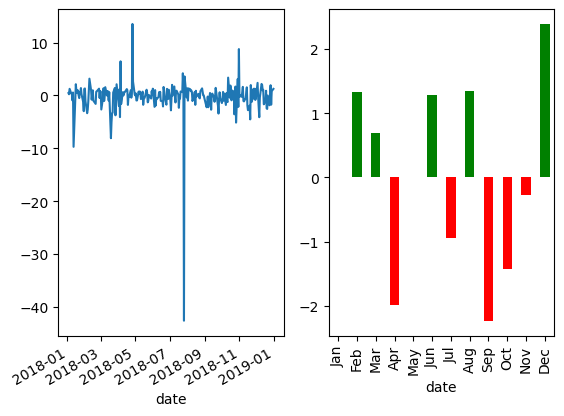

In [137]:
import pandas as pd, matplotlib.pyplot as plt

eq_df = pd.read_csv('earthquakes-1.csv')
fb_2018 = pd.read_csv('fb_stock_prices_2018.csv')

# Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
fig, ax = plt.subplots()
fb_2018['close'].rolling(window=20).min().plot(ax=ax)
ax.set_title('20-day Rolling Minimum Closing Price')
ax.set_xlabel('Days')
ax.set_ylabel('Price')

# Create a histogram and KDE of the change from open to close in the price of Facebook stock.
fig1, (ax1, ax2) = plt.subplots(1, 2)
(fb_2018['open'] - fb_2018['close']).plot(kind='hist', ax = ax1)
ax1.set_title('Histogram')

(fb_2018['open'] - fb_2018['close']).plot(kind='kde', ax = ax2)
ax2.set_title('KDE')

# Box plots for the magnitudes of each magType used in Indonesia
fig2, ax3 = plt.subplots()
eq_df[eq_df['parsed_place'] == 'California'].boxplot(column='mag', by='magType', showfliers=False, ax=ax3) # showfliers = False for clean figure
ax3.set_title('Magtype Magnitudes')

# Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line
print(fb_2018['date'].dtype) # Check for type first
fb_copy = fb_2018.copy() # Make dataframe copy
fb_copy['date'] = pd.to_datetime(fb_copy['date']) # Convert to datetime
fb_copy.set_index('date', inplace = True)

fig3, ax4 = plt.subplots()
(fb_copy.resample('W').max() - fb_copy.resample('W').min()).plot(kind = 'line', ax=ax4)
ax4.set_title('Weekly High-Low Difference')

# Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
'''The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing
price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this). '''
fb_copy2 = fb_2018.copy()
fb_copy2['date'] = pd.to_datetime(fb_copy2['date'])
fb_copy2.set_index('date', inplace = True)

fig4, (ax5, ax6) = plt.subplots(1,2)
(fb_copy2['open'] - fb_copy2['close'].shift(1)).plot(ax=ax5)

# The second subplot will be a bar plot showing the net effect this had monthly, using resample().
monthly_open = fb_copy2['open'].resample('ME').first()
monthly_close = fb_copy2['close'].resample('ME').last()
monthly_difference = (monthly_open - monthly_close.shift(1))

# Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red)
bar = ['green' if x > 0 else 'red' for x in monthly_difference]
monthly_difference.plot(kind='bar', ax=ax6, color = bar)

# Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.
ax6.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

To summarize, this activity taught me that there is probably a method for every niche thing that I'm trying to do. Some examples of this are
the shift() and resample() methods. I learned that through experience, I'll get to know more of these niche methods, which makes studying more
exciting. 